In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

print("Modules imported!")

Modules imported!


In [ ]:
mask_incorrect = []
with_mask = []
without_mask = []

all_paths = ['drive/MyDrive/Masks/mask_weared_incorrect', 'drive/MyDrive/Masks/with_mask', 'drive/MyDrive/Masks/without_mask']

for path in all_paths:
  the_files = [f for f in listdir(path) if isfile(join(path, f)) and '(' not in f]

  for f in the_files:
    img = Image.open(open(path+"/"+f, 'rb'))
    img = img.resize((64,64))
    arr = np.array(img) / 255.0

    if 'mask_weared_incorrect' in path:
      mask_incorrect.append(arr) 
    elif 'with_mask' in path:
      with_mask.append(arr)
    elif 'without_mask' in path:
      without_mask.append(arr)
    else:
      print("ERROR")
      break

mask_incorrect = np.array(mask_incorrect)
with_mask = np.array(with_mask)
without_mask = np.array(without_mask)

print(with_mask.shape, mask_incorrect.shape, without_mask.shape)

(2994, 64, 64, 3) (2994, 64, 64, 3) (2994, 64, 64, 3)


In [ ]:
imgs = np.concatenate((without_mask, mask_incorrect, with_mask))
labels = np.array([0 for i in range(2994)] + [1 for i in range(2994)] + [2 for i in range(2994)])
labels = to_categorical(labels)

print(imgs.shape)
print(labels.shape)

(8982, 64, 64, 3)
(8982, 3)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(imgs, labels, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7185, 64, 64, 3) (7185, 3)
(1797, 64, 64, 3) (1797, 3)


In [ ]:
model = Sequential()
model.add(Conv2D(64, input_shape=(64,64,3), kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(
    height_shift_range=0.1,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
)
datagen.fit(X_train)

model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=10, validation_data=(X_test, y_test))
model.save('sample_data/Mask_CNN.h5')

Epoch 1/10
113/113 [==============================] - 12s 91ms/step - loss: 0.6747 - accuracy: 0.6999 - val_loss: 0.3725 - val_accuracy: 0.8737
Epoch 2/10
113/113 [==============================] - 9s 83ms/step - loss: 0.4183 - accuracy: 0.8411 - val_loss: 0.2987 - val_accuracy: 0.8926
Epoch 3/10
113/113 [==============================] - 9s 83ms/step - loss: 0.3389 - accuracy: 0.8689 - val_loss: 0.2465 - val_accuracy: 0.9204
Epoch 4/10
113/113 [==============================] - 9s 83ms/step - loss: 0.3005 - accuracy: 0.8857 - val_loss: 0.1839 - val_accuracy: 0.9304
Epoch 5/10
113/113 [==============================] - 9s 83ms/step - loss: 0.2622 - accuracy: 0.9002 - val_loss: 0.2152 - val_accuracy: 0.9265
Epoch 6/10
113/113 [==============================] - 10s 84ms/step - loss: 0.2218 - accuracy: 0.9168 - val_loss: 0.2232 - val_accuracy: 0.9160
Epoch 7/10
113/113 [==============================] - 9s 83ms/step - loss: 0.2123 - accuracy: 0.9239 - val_loss: 0.1269 - val_accuracy: 0.95

In [ ]:
model = load_model('sample_data/Mask_CNN.h5')

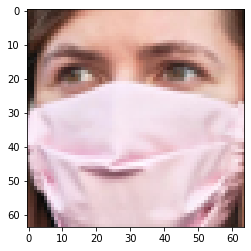

2


In [ ]:
def img_to_pred(img_path):
  img = Image.open(img_path)
  img_arr = np.array(img.resize((64,64)))[:, :, :3]
  img_arr = img_arr / 255.0

  plt.imshow(img_arr) 
  plt.show()

  pred = model.predict(img_arr.reshape(1,64,64,3))
  true_pred = np.argmax(pred)

  return true_pred

print(img_to_pred('sample_data/E.jpg'))